In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving car_age_price.csv to car_age_price.csv


In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['car_age_price.csv']))
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [34]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<Axes: >

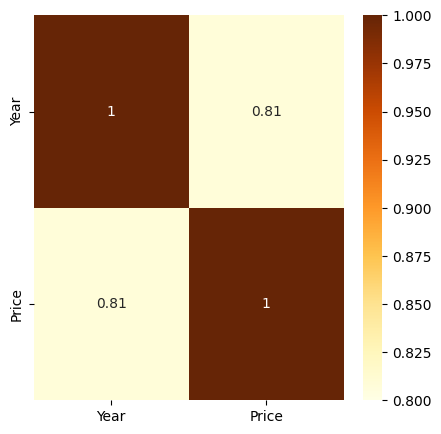

In [38]:
corr_graph=data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr_graph,vmin=0.8,vmax=1,cmap='YlOrBr',annot=True)

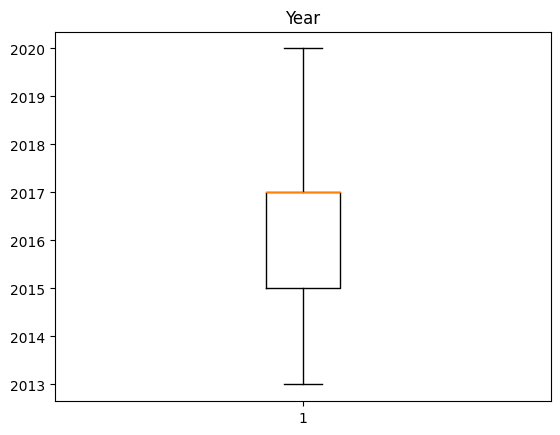

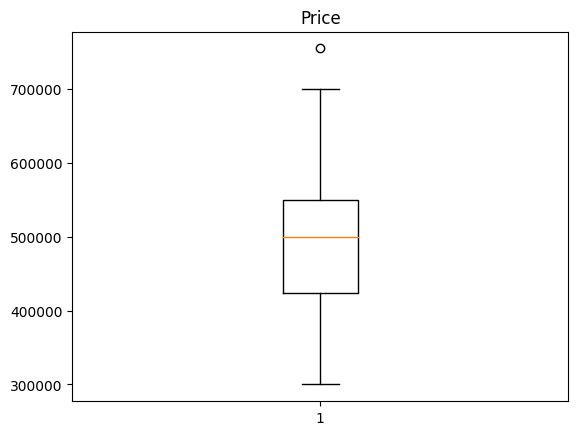

In [39]:
num_col=['Year','Price']
for i in num_col:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

Old Shape:  (58, 2)
New Shape:  (58, 2)


<ipython-input-42-f21c9a7d02e0>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Price'], 25,
<ipython-input-42-f21c9a7d02e0>:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['Price'], 75,


<Axes: xlabel='Price'>

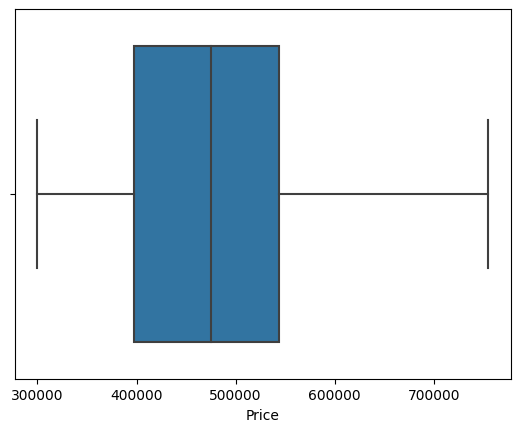

In [42]:
from sklearn.exceptions import DataConversionWarning
# IQR
Q1 = np.percentile(data['Price'], 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(data['Price'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['Price'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(data['Price'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)
 
sns.boxplot(x='Price', data=data)

In [44]:
from sklearn.preprocessing import MinMaxScaler
normalizer =MinMaxScaler()
x = data.drop('Price', axis = 1)
y = data['Price']
x.dtypes

Year    int64
dtype: object

In [45]:
d1=normalizer.fit_transform(x)
type(d1)

numpy.ndarray

In [46]:
d1=normalizer.fit_transform(x)
x.columns

Index(['Year'], dtype='object')

In [49]:
d1=pd.DataFrame(d1,columns=['Price'])
d1

,Price
0,0.714286
1,0.857143
2,0.857143
3,0.285714
4,0.428571
5,0.571429
6,0.571429
7,0.857143
8,0.714286
9,0.571429


In [111]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the input features (X) and target variable (y)
X = data[['Price']]
y = data['Year']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Lasso Regression
lasso_regression = Lasso(alpha=0.1)  # You can adjust the alpha value
lasso_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_regression.predict(X_test)
y_pred_lasso = lasso_regression.predict(X_test)

# Calculate the mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Linear Regression MSE:", mse_linear)
print("Lasso Regression MSE:", mse_lasso)

Linear Regression MSE: 1.2394345816571226
Lasso Regression MSE: 1.2394342867020507


Text(0, 0.5, 'y_pred')

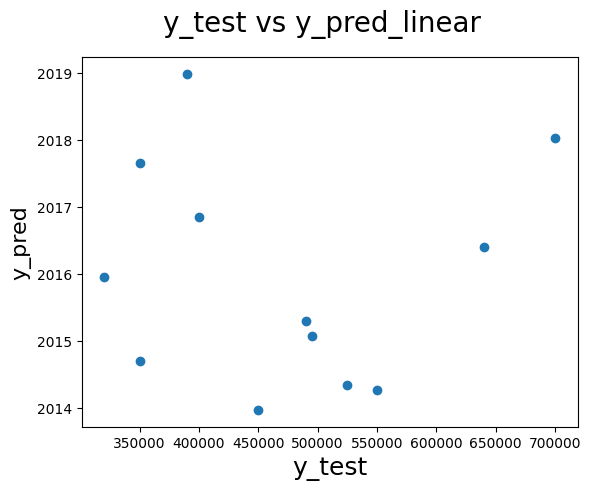

In [109]:
fig = plt.figure()
plt.scatter(y_test,y_pred_linear)
fig.suptitle('y_test vs y_pred_linear', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

# Another method

In [83]:
from google.colab import files
uploaded = files.upload()

Saving car_age_price.csv to car_age_price (1).csv


In [85]:
import io
df = pd.read_csv(io.BytesIO(uploaded['car_age_price.csv']))

In [86]:
data["Year"].value_counts()

2017    15
2015    12
2019     7
2018     6
2016     6
2014     5
2020     4
2013     3
Name: Year, dtype: int64

In [87]:
data.shape

(58, 2)

In [ ]:
duplicated=data[data.duplicated()]
duplicated

In [89]:
data.drop_duplicates(inplace=True)

In [90]:
data.shape

(58, 2)

In [91]:
data["Year"].value_counts()

2017    15
2015    12
2019     7
2018     6
2016     6
2014     5
2020     4
2013     3
Name: Year, dtype: int64

In [92]:
data.isna().sum()

Year     0
Price    0
dtype: int64

# Linear Regression Model

In [93]:
x=data.drop(["Price"],axis=1)

In [94]:
x.head(5)

,Year
0,2018
1,2019
2,2019
5,2015
6,2016


In [95]:
y=data["Price"]
y

0      465000
1      755000
2      700000
5      350000
6      425000
7      575000
8      509999
10     500000
11     500000
12     500000
13     600000
14     475000
17     550000
22     434999
30     650000
34     450000
37     486000
38     475000
39     545000
40     525000
42     550000
43     550000
45     450000
48     396000
49     600000
50     325000
52     345000
54     525000
56     341000
58     450000
59     550000
60     490000
61     540000
63     595000
65     495000
67     400000
68     465000
69     300000
70     450000
71     490000
73     320000
77     325000
78     409999
80     390000
81     390000
83     480000
85     320000
86     520000
97     640000
98     700000
99     600000
100    350000
103    375000
104    400000
107    375000
108    300000
109    425000
110    420000
Name: Price, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [98]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(x_train,y_train)
lr_predict=lr_model.predict(x_test)

In [99]:
from sklearn.metrics import mean_squared_error,r2_score

In [100]:
print("Mean Squared Error =",mean_squared_error(y_test,lr_predict))
print("R Squared Error=",r2_score(y_test,lr_predict))

Mean Squared Error = 3545632860.9680295
R Squared Error= 0.7258825663162266


# Lasso Regression model

In [101]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
ls_model=lasso.fit(x_train,y_train)
ls_predict=ls_model.predict(x_test)

In [102]:
print("Mean Squared Error=",mean_squared_error(y_test,ls_predict))
print("R Squared Error=",r2_score(y_test,ls_predict))

Mean Squared Error= 3545634157.5119324
R Squared Error= 0.7258824660787511


# Prediction of the Price in the year 2022(Using Linear Regression)

In [103]:
x_2022=pd.DataFrame({'Year':[2022]})

In [104]:
lr_predict=lr_model.predict(x_2022)

In [105]:
import numpy as np
np.round(lr_predict,2)

array([714251.93])

We get the value 714251.93 The value of 2022 model seond-hand Hundai grand i10 car is 714251.93

In [106]:
data.loc[6]

Year       2016
Price    425000
Name: 6, dtype: int64

In [107]:
x_2016=pd.DataFrame({'Year':[2016]})
lr_predict=lr_model.predict(x_2016)
np.round(lr_predict,2)

array([452404.51])